# CalCOFI data:
We are going to try to answer to the below questions:
1. Is there relantionship between water salinity & water temperature?
2. Can you predict the water temperature based on salinity?

### Import libraries

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator
import missingno
from sklearn.linear_model import LinearRegression
from IPython.display import display
from pandas.api.types import CategoricalDtype
from category_encoders import MEstimateEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

### Import Data and Initial EDA on a sample

In [134]:
bottle = pd.read_csv('bottle.csv')
bottle.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [136]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [195]:
bottle_cols = bottle.columns
# taking a data sample only
bottle_wat_sal = bottle[bottle_cols[5:7]][0:1000].copy()
bottle_wat_sal.columns = ['Water_temp','Salinity']

<AxesSubplot:>

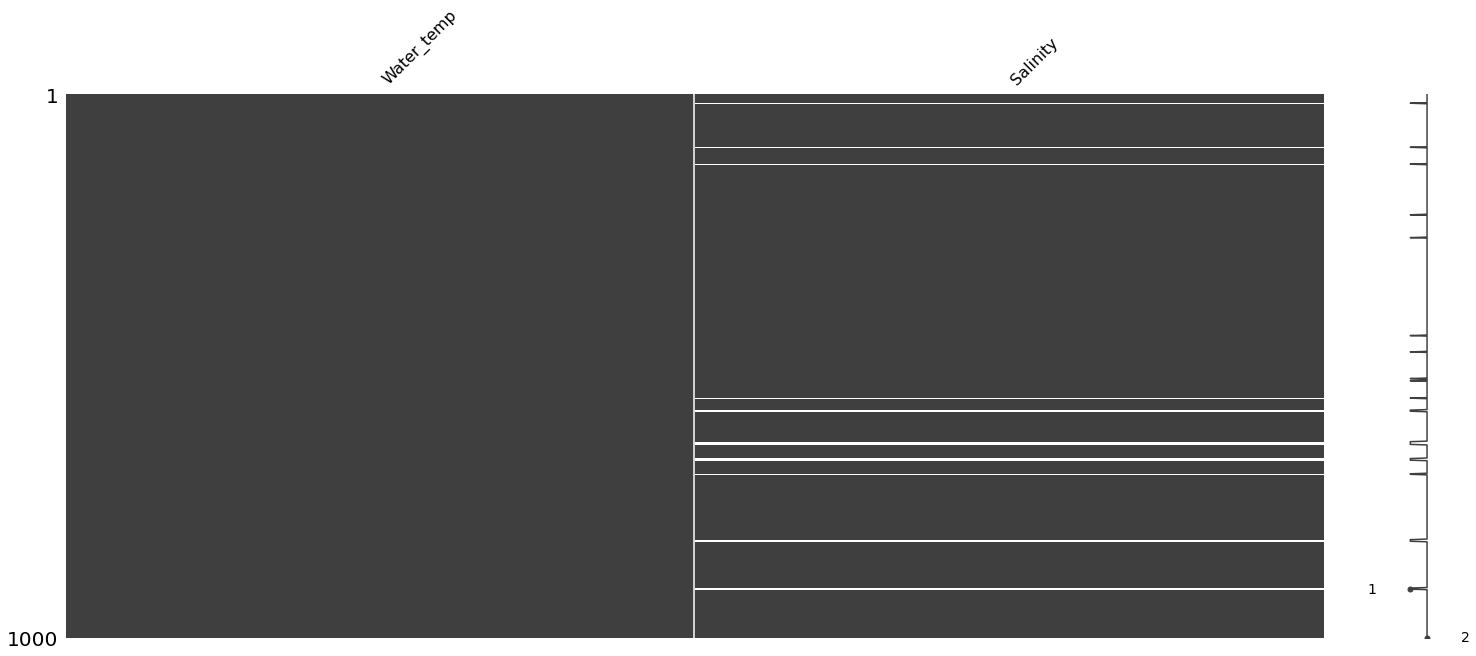

In [173]:
missingno.matrix(bottle_wat_sal)

There are few missing values in Water Temperature and many more, but still not too many for Salinity.
We are going to fillna with mean values for now.

In [174]:
bottle_wat_sal.fillna(method='ffill',inplace=True)
bottle_wat_sal['Water_temp'] = bottle_wat_sal['Water_temp'].astype(float)
bottle_wat_sal['Salinity'] = bottle_wat_sal['Salinity'].astype(float)

<AxesSubplot:xlabel='Water_temp', ylabel='Count'>

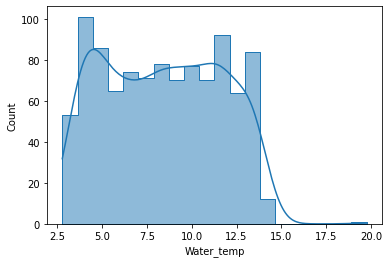

In [201]:
sns.histplot(data=bottle_wat_sal, x='Water_temp',kde=True, element='step',bins=20)

<AxesSubplot:xlabel='Salinity', ylabel='Count'>

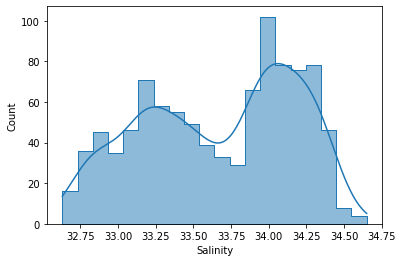

In [199]:
sns.histplot(data=bottle_wat_sal, x='Salinity',kde=True, element='step', bins=20)

<AxesSubplot:xlabel='Water_temp', ylabel='Salinity'>

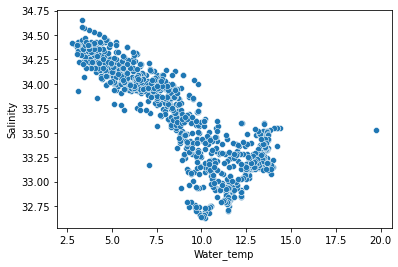

In [177]:
sns.scatterplot(data=bottle_wat_sal, x='Water_temp', y='Salinity')

<AxesSubplot:xlabel='Salinity', ylabel='Water_temp'>

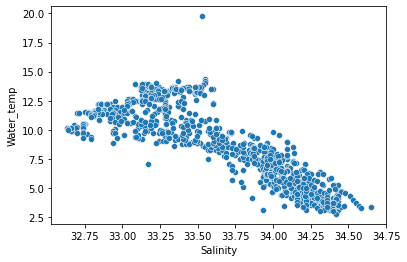

In [179]:
sns.scatterplot(data=bottle_wat_sal, x='Salinity', y='Water_temp' )

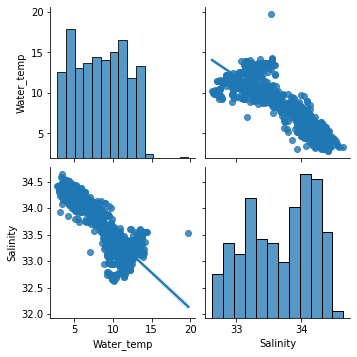

In [180]:
sns.pairplot(bottle_wat_sal, kind="reg")

### Feature selection

In [181]:
# Features chose
y = np.array(bottle_wat_sal['Salinity']).reshape(-1, 1)
X = np.array(bottle_wat_sal['Water_temp']).reshape(-1, 1)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

In [183]:
lin_reg = LinearRegression()
# lin_reg = LinearRegression(fit_intercept=True, n_jobs=None, normalize=False)
# regr = linear_model.LinearRegression()

In [184]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [185]:
y_pred = lin_reg.predict(X_test)

In [186]:
model_accuracy = lin_reg.score(X_test, y_test)
print("Model Accuracy: " + "{:.1%}".format(model_accuracy))

Model Accuracy: 74.0%


In [187]:
lin_reg_df = pd.DataFrame(X_test)
lin_reg_df['Salinity'] = y_test
lin_reg_df.rename(columns={0:"Water_temp"}, inplace=True)

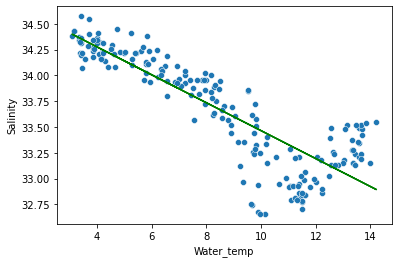

In [188]:
sns.scatterplot(data=lin_reg_df, x='Water_temp', y='Salinity')
plt.plot(X_test, y_pred, color='g')
plt.show()

In [189]:
lin_df = LinearRegression()
lin_df.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 74.0%


In [191]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.74


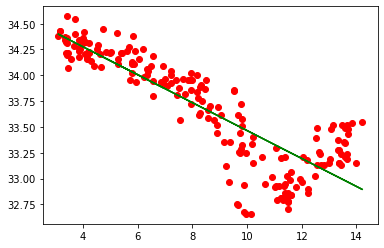

In [192]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

### Multiple Linear Regression

In [193]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-0.1351784]])

In [194]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 0.26
R2 Score for Test set: 0.728


### Multiple Linear Regression - Model Tuning

In [231]:
# cross validation method is giving better and clear result
print(cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean())
print(mlin_df.score(X_train, y_train))      # r2 value
print(np.sqrt(-cross_val_score(mlin_df,
                         X_train,
                         y_train,
                         cv=10,
                         scoring = 'neg_mean_squared_error')).mean())

0.6256041327907897
0.7283141411501068
0.2634380351354162


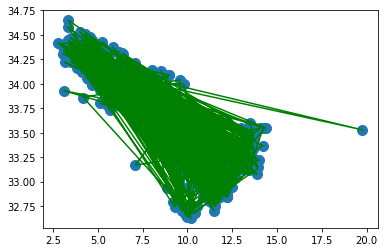

In [226]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

### Polynomial Regression

In [232]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [233]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.22
R2 Score for Test set: 0.81


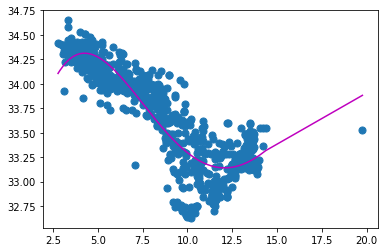

In [234]:
plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

There is an outlier clearly messing with the regression.

### Decision Tree Regression

In [243]:
dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)
dt_predict = dt_reg.predict(X_train)
#dt_predict.mean()

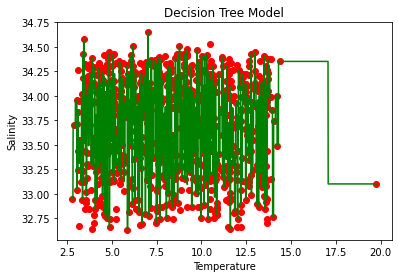

In [244]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [245]:
rmse = np.sqrt(mean_squared_error(y_train,dt_predict))
r2 = r2_score(y_train,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.29
R2 Score for Test set: 0.68


R2 value is below both Polynomial and MultiLinear Regressions

### Random Forest Model

In [246]:
rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)
#rf_predict.mean()

<ipython-input-246-6e412903d39d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train,y_train)


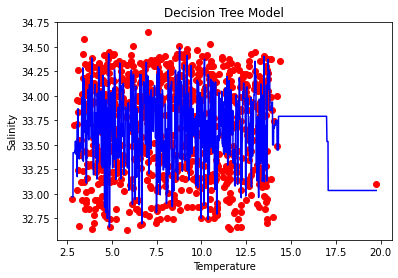

In [247]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [248]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.36
R2 Score for Test set: 0.5


R2 value is the lowest so far. We are going to use Polynomial Regression

## EDA and Linear Regression on the whole dataset
### EDA

<AxesSubplot:>

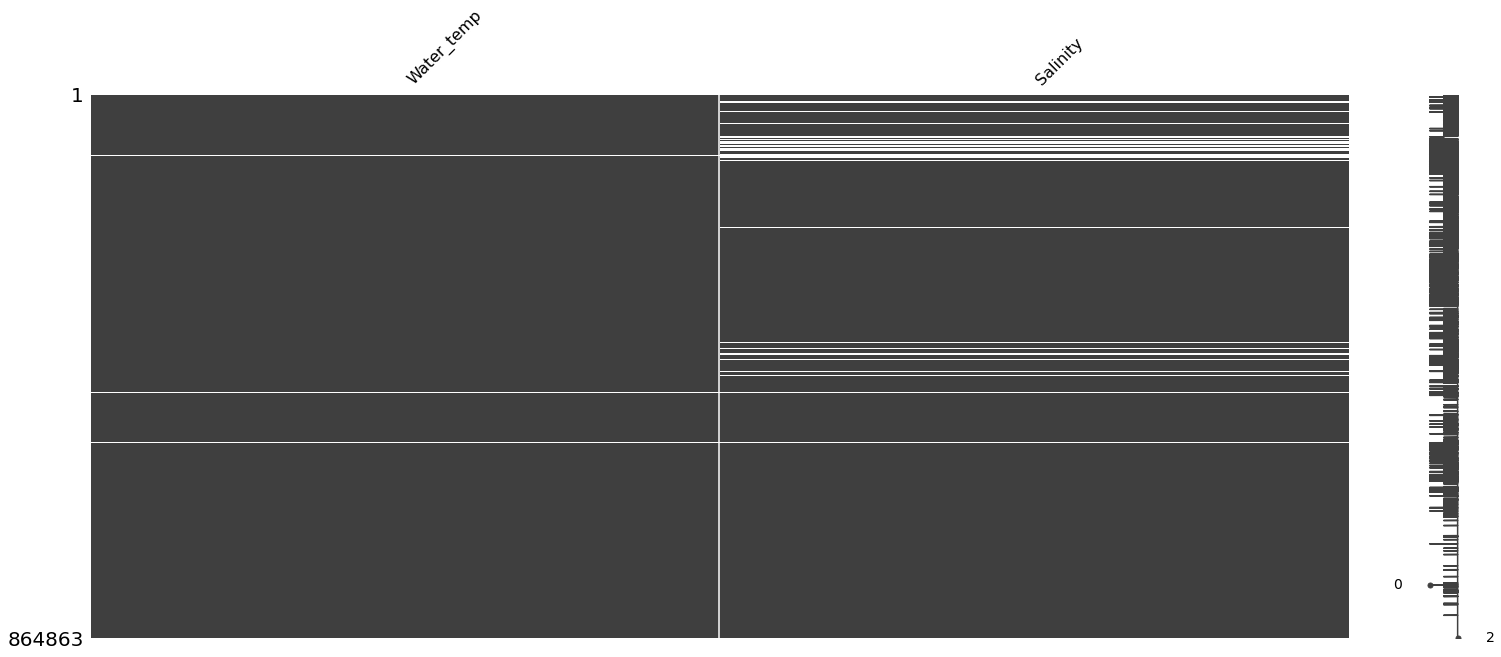

In [249]:
bottle_wat_sal_f = bottle[bottle_cols[5:7]].copy()
bottle_wat_sal_f.columns = ['Water_temp','Salinity']
missingno.matrix(bottle_wat_sal_f)

There are missing values as in the sample data. We will fill in the same way as before.

In [250]:
bottle_wat_sal_f.fillna(method='ffill',inplace=True)
bottle_wat_sal_f['Water_temp'] = bottle_wat_sal_f['Water_temp'].astype(float)
bottle_wat_sal_f['Salinity'] = bottle_wat_sal_f['Salinity'].astype(float)

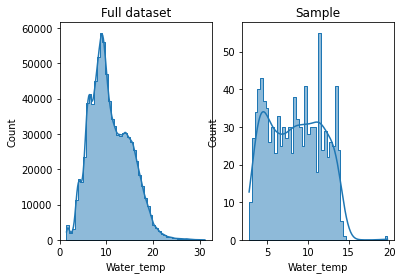

In [251]:
# plot both sample and complete dataset for Water Temp
fig, ax = plt.subplots(1,2)
sns.histplot(data=bottle_wat_sal_f, x='Water_temp',kde=True, element='step',bins=50, ax=ax[0])
ax[0].set_title('Full dataset')
sns.histplot(data=bottle_wat_sal, x='Water_temp',kde=True, element='step',bins=50, ax=ax[1])
ax[1].set_title('Sample')
plt.show()

The distribution for Water Temperature is quite different and looks much closer to a nornmal distribution in the full dataset compared to the sample we extracted.

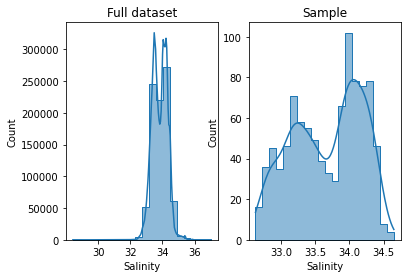

In [252]:
# plot both sample and complete dataset for Salinity
fig, ax = plt.subplots(1,2)
sns.histplot(data=bottle_wat_sal_f, x='Salinity',kde=True, element='step',bins=20, ax=ax[0])
ax[0].set_title('Full dataset')
sns.histplot(data=bottle_wat_sal, x='Salinity',kde=True, element='step',bins=20, ax=ax[1])
ax[1].set_title('Sample')
plt.show()

The full dataset shows some outliers, especially on the lower bound that might need to be taken care of if it creates too much noise in the data?

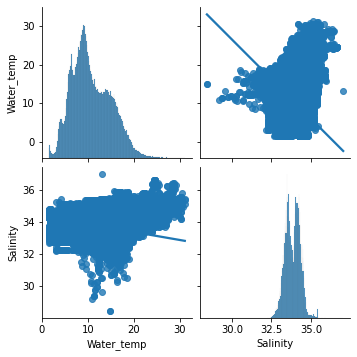

In [253]:
sns.pairplot(bottle_wat_sal_f, kind="reg")

### Linear Regression

In [255]:
# Features chose

X_f = np.array(bottle_wat_sal_f['Salinity']).reshape(-1, 1)
y_f = np.array(bottle_wat_sal_f['Water_temp']).reshape(-1, 1)

In [256]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size = 0.20, random_state = 42)

In [257]:
lin_f = LinearRegression()
lin_f.fit(X_train_f, y_train_f)

LinearRegression()

In [258]:
y_pred_f = lin_f.predict(X_test_f)                                     # Predict Linear Model
accuracy_score_f = lin_f.score(X_test_f, y_test_f)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score_f))

Linear Regression Model Accuracy Score: 20.3%


R2 Score: 0.203


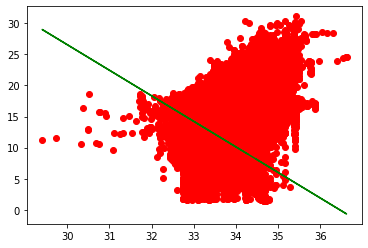

In [259]:
print("R2 Score: " +"{:.3}".format(r2_score(y_test_f, y_pred_f)))
# Finally draw figure of Linear Regression Model

plt.scatter(X_test_f, y_test_f, color='r')
plt.plot(X_test_f, y_pred_f, color='g')
plt.show()

Linear Regression on full dataset is way less accurate on the training set. Moreover it seems the model is not even visually getting it right (the inclination is negative but should be positive looking at the picture).

### Multilinear Regression

In [260]:
mlin_f = LinearRegression()
mlin_f = mlin_f.fit(X_train_f, y_train_f)
mlin_f.intercept_       # constant b0
mlin_f.coef_            # variable coefficient

array([[-4.10507012]])

In [262]:
y_pred_f = mlin_f.predict(X_train_f)                                      # predict Multi linear Reg model
rmse_f = np.sqrt(mean_squared_error(y_train_f, mlin_f.predict(X_train_f)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse_f))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train_f, y_pred_f)));      # this is test error score

RMSE Score for Test set: 3.8
R2 Score for Test set: 0.205


In [263]:
# cross validation method is giving better and clear result
print(cross_val_score(mlin_f, X_f, y_f, cv=10, scoring = 'r2').mean())
print(mlin_f.score(X_train_f, y_train_f))      # r2 value
print(np.sqrt(-cross_val_score(mlin_f,
                               X_train_f,
                               y_train_f,
                               cv=10,
                               scoring = 'neg_mean_squared_error')).mean())

0.2021306347754909
0.20460245351715156
3.799635768064263


In [270]:
# we can't show this as there is a hardcoded limit in # of points that can be displayed
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000
# code to bypass error

In [271]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train_f, y_train_f, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train_f,y_pred_f), key=sort_axis)
X_test_f, y_pred_f = zip(*sorted_zip)
plt.plot(X_train_f, y_train_f, color='g')
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

### Polynomial Regression

In [272]:
poly_f = PolynomialFeatures(degree = 4)
transform_poly_f = poly_f.fit_transform(X_train_f)

linreg2_f = LinearRegression()
linreg2_f.fit(transform_poly_f,y_train_f)

polynomial_predict_f = linreg2_f.predict(transform_poly_f)

In [274]:
rmse_f = np.sqrt(mean_squared_error(y_train_f,polynomial_predict_f))
r2_f = r2_score(y_train_f,polynomial_predict_f)
print("RMSE Score for Test set: " +"{:.2}".format(rmse_f))
print("R2 Score for Test set: " +"{:.2}".format(r2_f))

RMSE Score for Test set: 3.5
R2 Score for Test set: 0.32


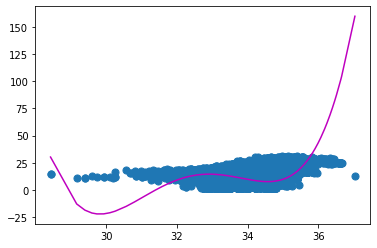

In [275]:
plt.scatter(X_train_f, y_train_f, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train_f,polynomial_predict_f), key=sort_axis)
X_train_f, polynomial_predict_f = zip(*sorted_zip)
plt.plot(X_train_f, polynomial_predict_f, color='m')
plt.show()

Like all other models Polynomial has a sharp decrease in accuracy but is somehow better than other models.

### Random Forest Model

In [277]:
rf_reg_f = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg_f.fit(X_train_f,y_train_f)
rf_predict_f = rf_reg_f.predict(X_train_f)
#rf_predict.mean()

<ipython-input-277-dfb2650654db>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_f.fit(X_train_f,y_train_f)


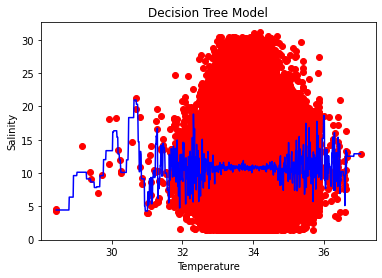

In [278]:
plt.scatter(X_train_f,y_train_f, color="red")                           # scatter draw
X_grid_f = np.arange(min(np.array(X_train_f)),max(np.array(X_train_f)), 0.01)
X_grid_f = X_grid_f.reshape((len(X_grid_f), 1))
plt.plot(X_grid_f,rf_reg_f.predict(X_grid_f),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [279]:
rmse_ff = np.sqrt(mean_squared_error(y_train_f,rf_predict_f))
r2_ff = r2_score(y_train_f,rf_predict_f)
print("RMSE Score for Test set: " +"{:.2}".format(rmse_ff))
print("R2 Score for Test set: " +"{:.2}".format(r2_ff))

RMSE Score for Test set: 4.2
R2 Score for Test set: 0.016


When we take into account the whole dataset model accuracy decreases dramatically and we should eventually do some better cleanup to get data or these 2 variables are not enough to predict each other.